In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

In [2]:
data = pd.read_csv('/Users/charlotteberthier/Documents/Memoire/9_Git_heritages_toxiques/source/ForeverPollutionProject/expert_dataset.csv')


In [3]:
df_france = data[data['country'] == "France"]

# Description du fichier csv source

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44588 entries, 0 to 44587
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     44588 non-null  object 
 1   lat          44588 non-null  float64
 2   lon          44588 non-null  float64
 3   name         22411 non-null  object 
 4   city         43249 non-null  object 
 5   country      44490 non-null  object 
 6   type         44588 non-null  object 
 7   sector       7851 non-null   object 
 8   source_type  44492 non-null  object 
 9   source_text  43884 non-null  object 
 10  source_url   39533 non-null  object 
 11  details      44588 non-null  object 
 12  matrix       22931 non-null  object 
 13  pfos         17519 non-null  float64
 14  pfoa         15391 non-null  float64
 15  pfos_pfoa    12704 non-null  float64
 16  pfna         3370 non-null   float64
 17  pfbs         6357 non-null   float64
 18  pfhxa        9296 non-null   float64
 19  pfhx

In [5]:
data.head(2)

,category,lat,lon,name,city,country,type,sector,source_type,source_text,...,pfos,pfoa,pfos_pfoa,pfna,pfbs,pfhxa,pfhxs,pfas_sum,date,year
0,Known PFAS user,52.5041,-0.682637,3F,Corby,United Kingdom,Industrial site,NaN,Company website,3F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Known PFAS user,50.8719,6.034520,3M,Kerkrade,Netherlands,Industrial site,Manufacture of rubber and plastic products,Company website,3M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Nombre de sites enregistrés par pays 

In [6]:
# Group by : nombre de sites enregistrés par pays
groupby_country = data.groupby('country').count()
groupby_country

,category,lat,lon,name,city,type,sector,source_type,source_text,source_url,...,pfos,pfoa,pfos_pfoa,pfna,pfbs,pfhxa,pfhxs,pfas_sum,date,year
country,,,,,,,,,,,,,,,,,,,,,
Austria,291,291,291,263,291,291,237,291,286,285,...,29,32,29,13,4,8,4,41,0,41
Belgium,7780,7780,7780,3030,7204,7780,333,7685,7668,5178,...,5484,5018,4487,1053,1853,3957,2842,6791,2673,6791
Bulgaria,151,151,151,138,146,151,103,151,143,125,...,17,17,17,17,4,4,4,17,0,17
Croatia,36,36,36,34,35,36,14,36,30,30,...,5,5,5,5,3,3,3,5,0,5
Cyprus,24,24,24,23,24,24,10,24,17,17,...,1,1,1,1,0,1,0,1,0,1
Czech Republic,241,241,241,220,237,241,187,241,235,235,...,30,29,28,30,16,20,23,31,0,31
Denmark,2358,2358,2358,549,2343,2358,173,2358,2351,2350,...,1393,1496,1214,497,785,841,895,2161,0,2161
Estonia,35,35,35,33,35,35,17,35,26,26,...,2,2,2,2,1,2,2,2,0,2
Finland,446,446,446,414,437,446,224,446,437,437,...,159,62,62,117,32,53,52,180,0,180


In [7]:
gdf_groupby_country = gpd.GeoDataFrame(data.groupby(data['country']).size(), columns=["nb_sites_PFAS"]).sort_values(by="nb_sites_PFAS", ascending=False).reset_index()
gdf_groupby_country['PourcentOfTotal'] = (gdf_groupby_country['nb_sites_PFAS'] / gdf_groupby_country['nb_sites_PFAS'].sum() * 100).round(2)
gdf_groupby_country


,country,nb_sites_PFAS,PourcentOfTotal
0,Sweden,11800,26.52
1,Belgium,7780,17.49
2,Netherlands,5203,11.69
3,Germany,4263,9.58
4,Italy,3675,8.26
5,United Kingdom,2522,5.67
6,Denmark,2358,5.30
7,France,2100,4.72
8,Spain,1131,2.54
9,Norway,598,1.34


# Comparaison des densités de sites selon la superficie des pays

In [8]:
df_superficies_EU = pd.DataFrame({
    "country": [
        'France', 'Spain', 'Sweden', 'Germany', 'Finland', 'Poland', 'Italy', 
        'Romania', 'Greece', 'Bulgaria', 'Hungary', 'Portugal', 'Austria', 
        'Czech Republic', 'Ireland', 'Lithuania', 'Latvia', 'Croatia', 
        'Slovakia', 'Estonia', 'Denmark', 'Netherlands', 'Belgium', 'Slovenia', 
        'Cyprus', 'Luxembourg', 'Malta', 'Switzerland', 'United Kingdom', 
        "Ukraine", "Iceland", "Finland", "Norway"
    ],
    "surface_km2": [
        638475, 505983, 447424, 357569, 338411, 311928, 302079, 
        238398, 131694, 110996, 93012, 92227, 83878, 
        78871, 69947, 65284, 64586, 56594, 
        49035, 45336, 42925, 37378, 30667, 20273, 
        9253, 2595, 316, 41285, 243610,
        603500, 103000, 338000, 385207
    ]
})

In [9]:
gdf_groupby_country = pd.merge(gdf_groupby_country, df_superficies_EU, on='country', how='left')

In [10]:
gdf_groupby_country['density'] = gdf_groupby_country['nb_sites_PFAS'] / gdf_groupby_country['surface_km2']

# Cartographie des sites

In [11]:
# Conversion en géodataframe 

gdf_data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat),crs="EPSG:4326")


<Axes: >

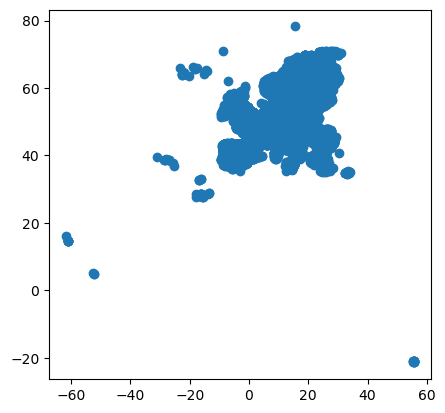

In [12]:
# Plot simple des points

gdf_data.plot()

# FFP France - Sources de données 

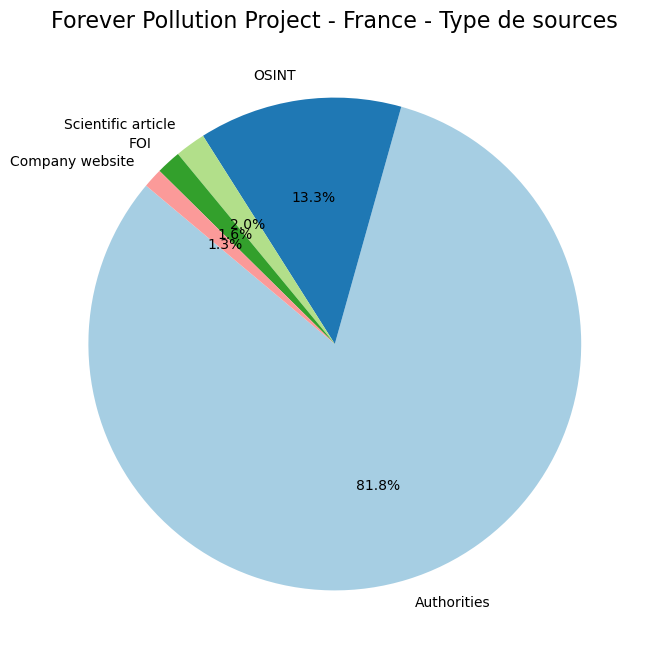

In [13]:
source_type_counts = df_france['source_type'].value_counts()

# Créer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(source_type_counts, labels=source_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Forever Pollution Project - France - Type de sources', fontsize=16)

# Afficher le graphique
plt.show()

In [14]:
df_filtered = df_france.loc[df_france['source_type'] == "Authorities", 'source_text'].value_counts()
df_filtered

source_text
European Environment Agency E-PRTR    724
Naïades                               631
ADES                                  241
Aprona                                112
Dreal Auvergne-Rhône-Alpes              5
ARS Rhône-Alpes                         2
Géorisques                              1
Tefal                                   1
Name: count, dtype: int64

In [15]:
# Graphique 1 - Altair
# Filtrer les données pour obtenir uniquement celles avec source_type == "Authorities"
df_filtered = df_france[df_france['source_type'] == "Authorities"]

# Compter les occurrences de chaque source de texte
source_counts = df_filtered['source_text'].value_counts().reset_index()
source_counts = source_counts.sort_values(by='count', ascending=False)
source_counts.columns = ['source_text', 'count']

# Créer le countplot avec Altair
chart = alt.Chart(source_counts).mark_bar(color='skyblue').encode(
    x=alt.X('source_text:N', title='Source', sort="-y", axis=alt.Axis(labelAngle=-45, labelAlign='right')),
    y=alt.Y('count:Q', title='Nombre de mentions')
).properties(
    title='Forever Pollution Project - France - Origine des sources "Authorities"',
    width=600,
    height=400
)

chart.configure_title(fontSize=16).configure_axis(labelFontSize=12)

chart.show()


alt.Chart(...)

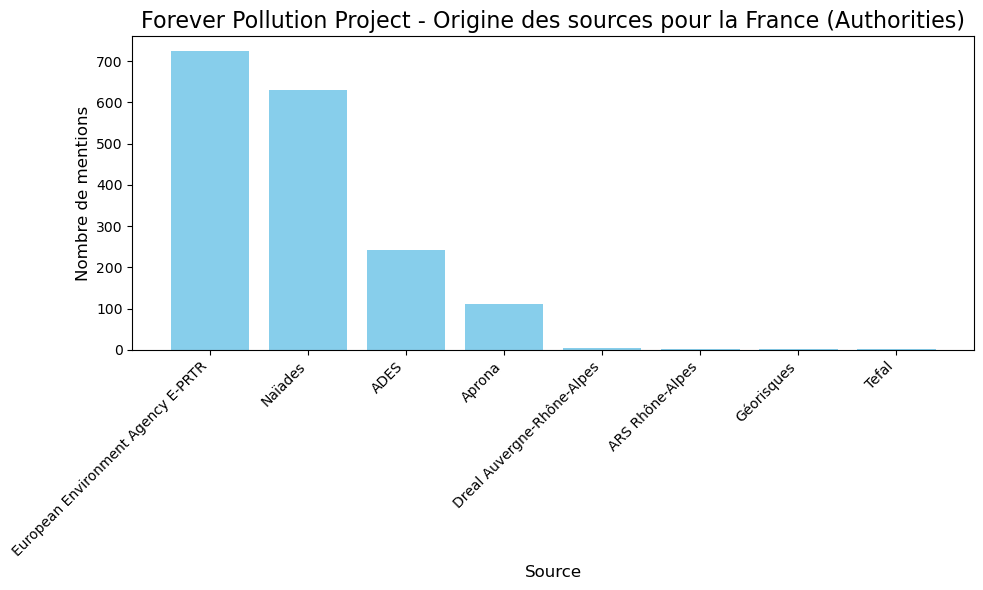

In [16]:
# Graph 2 - Matplotlib
# Compter les occurrences de chaque source de texte
source_counts = df_filtered['source_text'].value_counts()

# Créer le countplot sans Seaborn
plt.figure(figsize=(10, 6))
plt.bar(source_counts.index, source_counts.values, color='skyblue')
plt.title('Forever Pollution Project - Origine des sources pour la France (Authorities)', fontsize=16)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Nombre de mentions', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()  # Ajuste automatiquement la disposition pour éviter le chevauchement des étiquettes
plt.show()

In [17]:
df_france['source_text'].unique()

array(['3P', 'Aberflon', 'FOI document', 'BASF Agri Solutions', 'BioEx',
       'C2M Auroch', 'DEMGY SPN', 'Eau et Feu', 'Fluor one',
       'Fluorotechnique', 'ARS Rhône-Alpes', 'Freudenberg',
       'IKV Tribology', 'Maceplast', 'Orchidee',
       'Perimeter Solutions / Biogema', 'Pirep', 'SAFI', 'Sectoriel',
       'Spirel', 'Techniflon Europe', 'Géorisques', 'Tricoflex',
       'Weilburger coatings', 'European Environment Agency E-PRTR',
       'OurAirports', nan, 'DS Smith', 'Copacel', 'Google Maps', 'C2FPA',
       'EFORSA', 'GESIP centre Roussillon', 'PTRI CFD SDIS13',
       'Dauchy 2017', 'Naïades', 'Aprona', 'ADES', 'Muir 2021',
       'French Agency for Food, Environmental and Occupational Health & Safety (ANSES)',
       'Boiteux 2017', 'Dreal Auvergne-Rhône-Alpes', 'Tefal',
       'Dauchy 2019'], dtype=object)

In [18]:
groupby_source_admin = gpd.GeoDataFrame(df_france.groupby(data['source_text']).size(), columns=["nb_sites"]).sort_values(by="nb_sites", ascending=False).reset_index()
groupby_source_admin['PourcentOfTotal'] = (groupby_source_admin['nb_sites'] / groupby_source_admin['nb_sites'].sum() * 100).round(2)
groupby_source_admin


,source_text,nb_sites,PourcentOfTotal
0,European Environment Agency E-PRTR,724,35.16
1,Naïades,631,30.65
2,ADES,241,11.70
3,OurAirports,154,7.48
4,Aprona,112,5.44
5,Copacel,81,3.93
6,"French Agency for Food, Environmental and Occu...",33,1.60
7,Muir 2021,31,1.51
8,Boiteux 2017,9,0.44
9,Dreal Auvergne-Rhône-Alpes,5,0.24


# Comparaison avec la Belgique

In [19]:
df_belgium = data[data['country'] == "Belgium"]

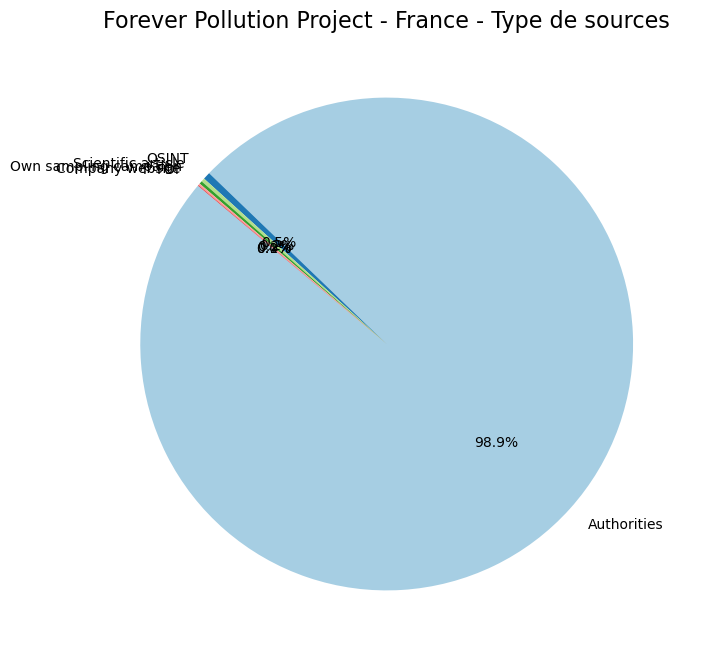

In [20]:
source_type_counts = df_belgium['source_type'].value_counts()

# Créer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(source_type_counts, labels=source_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Forever Pollution Project - France - Type de sources', fontsize=16)

# Afficher le graphique
plt.show()

In [21]:
groupby_source_admin_BEL = gpd.GeoDataFrame(df_belgium.groupby(data['source_text']).size(), columns=["nb_sites"]).sort_values(by="nb_sites", ascending=False).reset_index()
groupby_source_admin_BEL['PourcentOfTotal'] = (groupby_source_admin_BEL['nb_sites'] / groupby_source_admin_BEL['nb_sites'].sum() * 100).round(2)
groupby_source_admin_BEL


,source_text,nb_sites,PourcentOfTotal
0,Databank Ondergrond Vlaanderen,4586,59.81
1,Service public de Wallonie (SPW),2424,31.61
2,European Environment Agency E-PRTR,215,2.80
3,Bruxelles Environment,209,2.73
4,PFAS_freatisch_VMM_2022_voorjaar,106,1.38
5,Service Public de Wallonie,48,0.63
6,Muir 2021,18,0.23
7,Prélèvements RTBF,15,0.20
8,OurAirports,12,0.16
9,European Environment Agency,9,0.12


# Comparaison avec la Suède

In [22]:
df_sweden = data[data['country'] == "Sweden"]

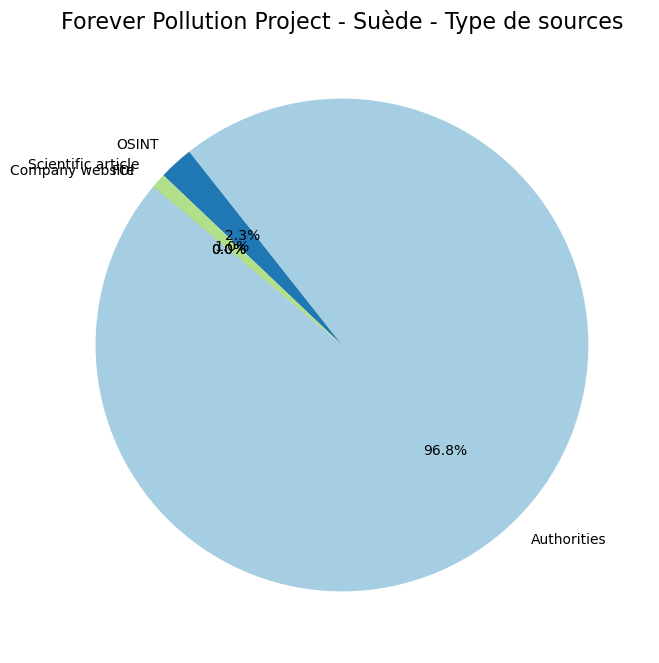

In [23]:
source_type_counts = df_sweden['source_type'].value_counts()

# Créer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(source_type_counts, labels=source_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Forever Pollution Project - Suède - Type de sources', fontsize=16)

# Afficher le graphique
plt.show()

In [24]:
groupby_source_admin_SWE = gpd.GeoDataFrame(df_sweden.groupby(data['source_text']).size(), columns=["nb_sites"]).sort_values(by="nb_sites", ascending=False).reset_index()
groupby_source_admin_SWE['PourcentOfTotal'] = (groupby_source_admin_SWE['nb_sites'] / groupby_source_admin_SWE['nb_sites'].sum() * 100).round(2)
groupby_source_admin_SWE


,source_text,nb_sites,PourcentOfTotal
0,Swedish Environmental Protection Agency/Swedis...,11298,95.90
1,Skogs Industrierna,193,1.64
2,European Environment Agency E-PRTR,95,0.81
3,Gobelius 2018,82,0.70
4,OurAirports,55,0.47
5,Muir 2021,30,0.25
6,European Environment Agency,24,0.20
7,European Commission Joint Research Center,2,0.02
8,Arhens 2015,1,0.01
9,Fomtec,1,0.01


In [25]:
# Graphique Altair
# Filtrer les données pour obtenir uniquement celles avec source_type == "Authorities"
df_filtered = df_sweden[df_sweden['source_type'] == "Authorities"]

# Compter les occurrences de chaque source de texte
source_counts = df_filtered['source_text'].value_counts().reset_index()
source_counts = source_counts.sort_values(by='count', ascending=False)
source_counts.columns = ['source_text', 'count']

# Créer le countplot avec Altair
chart = alt.Chart(source_counts).mark_bar(color='skyblue').encode(
    x=alt.X('source_text:N', title='Source', sort="-y", axis=alt.Axis(labelAngle=-45, labelAlign='right')),
    y=alt.Y('count:Q', title='Nombre de mentions')
).properties(
    title='Forever Pollution Project - Suède - Origine des sources "Authorities"',
    width=600,
    height=400
)

chart.configure_title(fontSize=16).configure_axis(labelFontSize=12)

chart.show()


alt.Chart(...)

# Comparaison avec l'Allemagne 

In [39]:
df_germany = data[data['country'] == "Germany"]

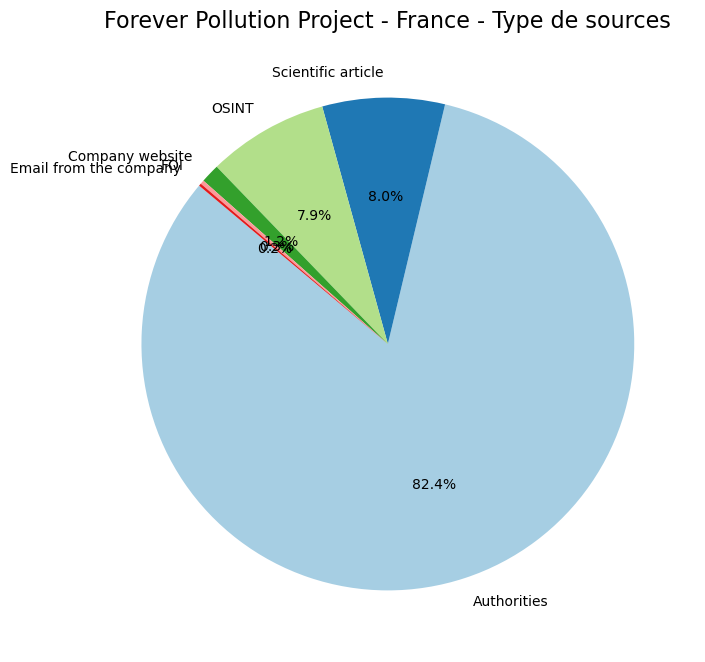

In [40]:
source_type_counts = df_germany['source_type'].value_counts()

# Créer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(source_type_counts, labels=source_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Forever Pollution Project - France - Type de sources', fontsize=16)

# Afficher le graphique
plt.show()

In [41]:
groupby_source_admin_GER = gpd.GeoDataFrame(df_germany.groupby(data['source_text']).size(), columns=["nb_sites"]).sort_values(by="nb_sites", ascending=False).reset_index()
groupby_source_admin_GER['PourcentOfTotal'] = (groupby_source_admin_GER['nb_sites'] / groupby_source_admin_GER['nb_sites'].sum() * 100).round(2)
groupby_source_admin_GER


,source_text,nb_sites,PourcentOfTotal
0,European Environment Agency,1272,30.73
1,"Landesanstalt für Umwelt, Messungen und Naturs...",393,9.50
2,European Environment Agency E-PRTR,380,9.18
3,Muir 2021,292,7.05
4,"Database ELWAS| Landesamt für Natur, Umwelt un...",269,6.50
...,...,...,...
124,Hessischer Landtag Drucksache 20/2405,1,0.02
125,Hessischer Landtag Drucksache 20/2352,1,0.02
126,HLNUG Grundwasser 2016,1,0.02
127,Fluor-tech Kunststoffe,1,0.02


# Comparaison Pays-Bas

In [42]:
df_netherlands = data[data['country'] == "Netherlands"]

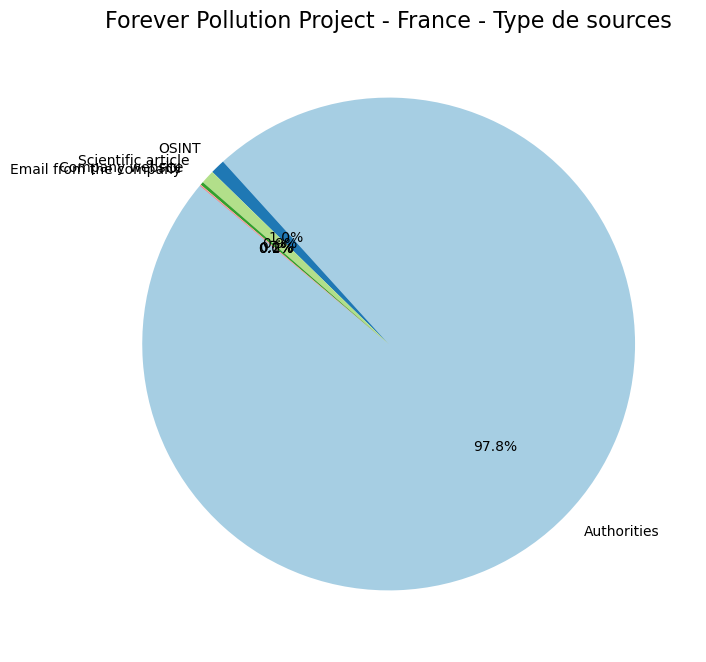

In [43]:
source_type_counts = df_netherlands['source_type'].value_counts()

# Créer le graphique en camembert
plt.figure(figsize=(8, 8))
plt.pie(source_type_counts, labels=source_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Forever Pollution Project - France - Type de sources', fontsize=16)

# Afficher le graphique
plt.show()

In [44]:
groupby_source_admin_NTH = gpd.GeoDataFrame(df_netherlands.groupby(data['source_text']).size(), columns=["nb_sites"]).sort_values(by="nb_sites", ascending=False).reset_index()
groupby_source_admin_NTH['PourcentOfTotal'] = (groupby_source_admin_NTH['nb_sites'] / groupby_source_admin_NTH['nb_sites'].sum() * 100).round(2)
groupby_source_admin_NTH


,source_text,nb_sites,PourcentOfTotal
0,Omgevingsdienst Noordzeekanaalgebied,4734,91.25
1,Rijksinstituut voor Volksgezondheid en Milieu ...,202,3.89
2,European Environment Agency E-PRTR,149,2.87
3,Muir 2021,47,0.91
4,Koninklijke Vereniging van Nederlandse Papier ...,18,0.35
5,OurAirports,17,0.33
6,Fraunhofer Institut / UBA,5,0.10
7,Byk,3,0.06
8,FOI document,3,0.06
9,Polyfluor Plastics,1,0.02


In [47]:
dict_superficies_EU = {
    "country": ['France', 'Spain', 'Sweden', 'Germany', 'Finland', "Poland", "Italy", "Romania", "Greece", "Bulgaria", "Hungary", "Portugal", "Austria", "Czech Republic", "Ireland", "Lituania", "Lettonia", "Croatia", "Slovakia", "Denmark", "Netherlands", "Belgium", "Slovenia", "Cyprius", "Luxembourg", "Malta"],
    "surface_km2": [638475, 505983, 447424, 357569, 338411, 311928, 302079, 238398, 131694, 110996, 93012, 92227, 83878, 78871, 69947, 65284, 64586, 56594, 49035, 45336, 42925, 37378, 30667, 20273, 9253, 2595, 316]
}